In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from custom_data import *
from custom_functions import *

In [94]:
summary = pd.read_csv('data/atussum_2014.dat')
respondents = pd.read_csv("data/atusresp_2014.dat")
activities = pd.read_csv("data/atusact_2014.dat")
roster = pd.read_csv("data/atusrost_2014.dat")
who = pd.read_csv("data/atuswho_2014.dat")
elder_roster = pd.read_csv("data/atusrostec_2014.dat")


In [95]:
data_summary = summary.rename(columns= renamed_cols)

In [96]:
data_summary.head(10)

,case_id,stat_weight,age_youngest_child,age,sex,high_levl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0
5,20140101140537,3622350.817628,-1,85,1,36,2,2,1,5,...,0,0,0,0,0,0,0,0,0,0
6,20140101140559,3653337.861341,1,27,1,43,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
7,20140101140610,11589604.860274,0,28,1,42,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
8,20140101140614,2019096.316437,-1,63,2,40,1,2,1,1,...,0,0,0,0,0,0,0,0,70,0
9,20140101140639,5332005.152751,-1,85,1,44,1,2,1,5,...,0,0,0,0,0,0,0,0,0,0


In [97]:
data_activities = activities.rename(columns= renamed_cols)

In [98]:
activities.head()

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,TUCUMDUR24,TUEC24,TUSTARTTIM,TUSTOPTIME,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TXWHERE
0,20140101140007,1,-1,0,0,0,-1,0,-1,0,...,540,-1,04:00:00,13:00:00,1,1,1,10101,101,0
1,20140101140007,2,1,0,0,0,-1,0,-1,0,...,570,-1,13:00:00,13:30:00,3,1,1,30101,301,0
2,20140101140007,3,-1,60,60,0,-1,60,-1,60,...,630,-1,13:30:00,14:30:00,1,2,1,10201,102,0
3,20140101140007,4,13,10,10,0,-1,10,-1,10,...,640,-1,14:30:00,14:40:00,18,11,1,181101,1811,0
4,20140101140007,5,4,30,30,0,-1,30,-1,30,...,670,-1,14:40:00,15:10:00,11,1,1,110101,1101,0


In [99]:
sorted(data_summary.keys())

['Activities rel. to purchasing/selling real estate',
 "Activities related to hh child's education, n.e.c.*",
 "Activities related to hh child's health, n.e.c.*",
 'Administrative & support activities, n.e.c.*',
 'Administrative activities: class for degree, certification, or licensure',
 'Administrative for education, n.e.c.*',
 'Animal & pet care assistance for nonhh adults',
 'Appliance, tool, and toy set-up, repair, & maintenance (by self)',
 'Arts and crafts as a hobby',
 'Arts and crafts with hh children',
 'Arts and crafts with nonhh children',
 'Arts and entertainment, n.e.c.*',
 'Attending gambling establishments',
 "Attending hh children's events",
 'Attending meetings for personal interest (not volunteering)',
 'Attending meetings, conferences, & training',
 'Attending movies/film',
 'Attending museums',
 "Attending nonhh children's events",
 'Attending or hosting parties/receptions/ceremonies',
 'Attending performing arts',
 'Attending religious services',
 'Attending sport

In [100]:
data_summary["Appliance, tool, and toy set-up, repair, & maintenance (by self)"].sum()

10841

In [101]:
unemployed = (data_summary.labor_status >= 3)
employed = (data_summary.labor_status <= 2)


In [102]:
unemployed = data_summary[unemployed]
employed = data_summary[employed]


In [103]:
unemployed_petwalking = unemployed[['stat_weight', 'Walking / exercising / playing with animals']]
employed_petwalking = employed[['stat_weight', 'Walking / exercising / playing with animals']]

In [104]:
#unemployed_petwalking.sum()
#employed_petwalking.sum()

In [105]:
#data_columns(unemployed_petwalking, 'Walking / exercising / playing with animals')


In [106]:
unemployed_petwalking = ave_time(unemployed_petwalking, 'Walking / exercising / playing with animals')

In [107]:
unemployed_petwalking


3.7754902677031361

In [108]:
employed_petwalking = ave_time(employed_petwalking, 'Walking / exercising / playing with animals')

In [127]:
employed_petwalking

2.8200720324683557

In [128]:
both_petwalking = pd.DataFrame([employed_petwalking, unemployed_petwalking])

In [133]:
both_petwalking.columns = ["Time Walking or Playing with pets"]
both_petwalking.index = ["Working", "Not Working"]
both_petwalking

,Time Walking or Playing with pets
Working,2.820072
Not Working,3.775490


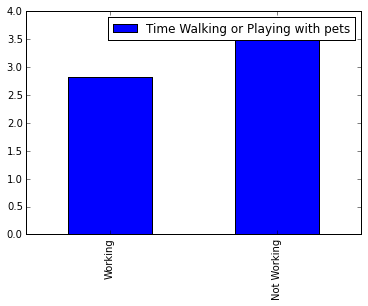

In [134]:
both_petwalking.plot(kind = 'bar')
